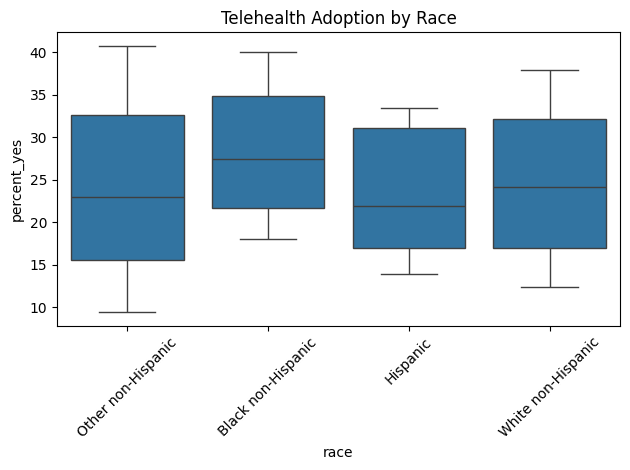

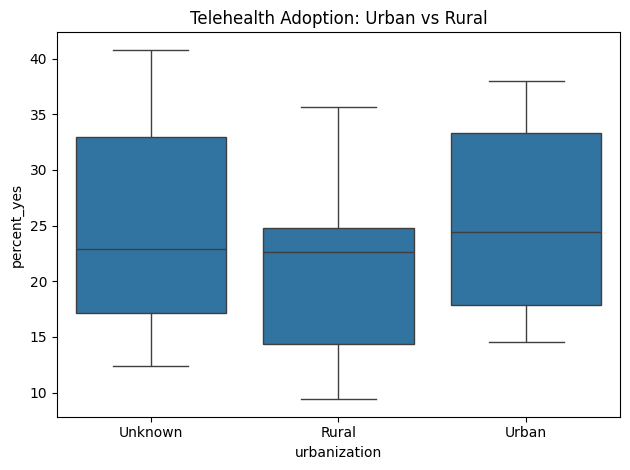

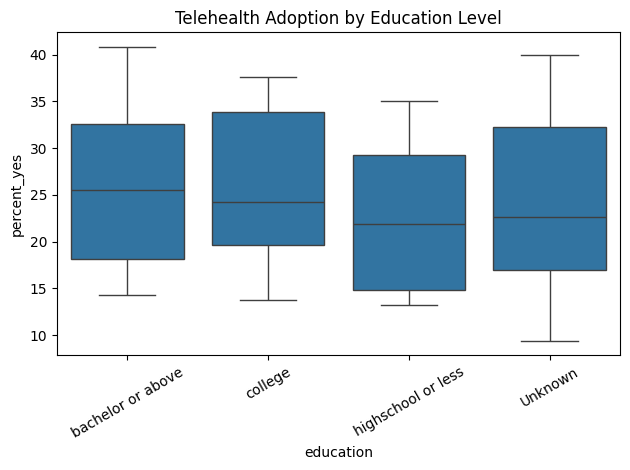

ANOVA - Race: F_onewayResult(statistic=0.5789685537790392, pvalue=0.6308149027900063)

 T-test - Urban vs Rural: TtestResult(statistic=0.8660120716769384, pvalue=0.39933967770026024, df=15.929366573378523)

 ANOVA - Education: F_onewayResult(statistic=0.2434171828281095, pvalue=0.8657326663886533)


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind


df = pd.read_csv("Access_and_telemedicine_use_COVID19_CLEAN.csv")


# Clean up
df["race"] = df["race"].astype(str).str.strip()
df = df[df["race"].notna() & (df["race"] != "")]
df = df[df["percent_yes"].notna()]
df["urbanization"] = df["urbanization"].astype(str).str.strip()
df["education"] = df["education"].astype(str).str.strip()


# Race Boxplot
sns.boxplot(x="race", y="percent_yes", data=df)
plt.title("Telehealth Adoption by Race")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Urbanization Boxplot
sns.boxplot(x="urbanization", y="percent_yes", data=df)
plt.title("Telehealth Adoption: Urban vs Rural")
plt.tight_layout()
plt.show()

# Education Boxplot
sns.boxplot(x="education", y="percent_yes", data=df)
plt.title("Telehealth Adoption by Education Level")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# ------------------ Hypothesis Testing ------------------

# 1. ANOVA for Race
race_groups = [group["percent_yes"].dropna() for _, group in df.groupby("race") if group["percent_yes"].dropna().shape[0] > 0]

if len(race_groups) >= 2:
    anova_race = f_oneway(*race_groups)
    print("ANOVA - Race:", anova_race)
else:
    print("\n Not enough valid race groups for ANOVA.")

# 2. T-test: Urban vs Rural
urban = df[df["urbanization"].str.lower().str.contains("urban")]["percent_yes"].dropna()
rural = df[df["urbanization"].str.lower().str.contains("rural")]["percent_yes"].dropna()

if len(urban) > 0 and len(rural) > 0:
    ttest_urban_rural = ttest_ind(urban, rural, equal_var=False)
    print("\n T-test - Urban vs Rural:", ttest_urban_rural)
else:
    print("\n Not enough data for Urban vs Rural T-test.")

# 3. ANOVA for Education
edu_groups = [group["percent_yes"].dropna() for _, group in df.groupby("education") if group["percent_yes"].dropna().shape[0] > 0]

if len(edu_groups) >= 2:
    anova_edu = f_oneway(*edu_groups)
    print("\n ANOVA - Education:", anova_edu)
else:
    print("\n Not enough valid education groups for ANOVA.")


In [7]:
race_groups = [group["percent_yes"].dropna() for _, group in df.groupby("race") if group["percent_yes"].dropna().shape[0] > 0]

if len(race_groups) >= 2:
    anova_race = f_oneway(*race_groups)
    print("ANOVA - Race:", anova_race)
else:
    print("Not enough valid race groups with data for ANOVA.")


ANOVA - Race: F_onewayResult(statistic=0.5789685537790392, pvalue=0.6308149027900063)
